In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image

In [22]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
CLASSES = 2

In [4]:
#define the convnet 
def build(input_shape, classes):
    model = models.Sequential() 
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25)) 

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [5]:
images = [image.load_img(p, target_size=(32, 32))
          for p in glob('cats_dogs/cats/*jpg') + glob('cats_dogs/dogs/*jpg')]
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [23]:
image_vector.shape

(2000, 32, 32, 3)

In [6]:
y=[1] * 1000 + [0] * 1000

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=42)

In [8]:
X_train.shape

(1600, 32, 32, 3)

In [9]:
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [10]:
y_test[0]

array([1., 0.], dtype=float32)

In [10]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
 
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1) 
#history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1) 
# 학습데이터에 있는 관측치의수 = 1600*0.8 = 1280
# 따라서 각 epoch에 대해서 10번 업데이트 발생
# 그런데 validation_split을 0.1로 하는 경우에는, 1440, 1440/128 = 11.25
# Keras의 경우는 마지막 mini-batch를 사용한다. 마지막 mini-batch에 존재하는 관측치의 수는 32 (=1440-11*128)

Epoch 1/50
12/12 [==============================] - 0s 17ms/step - loss: 0.2265 - accuracy: 0.9569 - val_loss: 1.3089 - val_accuracy: 0.6875
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1004 - accuracy: 0.9701 - val_loss: 1.2939 - val_accuracy: 0.6750
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0668 - accuracy: 0.9778 - val_loss: 1.2210 - val_accuracy: 0.6875
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0282 - accuracy: 0.9903 - val_loss: 1.4383 - val_accuracy: 0.6750
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0572 - accuracy: 0.9771 - val_loss: 1.1976 - val_accuracy: 0.6687
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 1.3287 - val_accuracy: 0.7063
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.9993 - val_loss: 1.5129 - val_accuracy: 0.6875
Epoch 8/50
12/12 [=

In [20]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 0s/step - loss: 2.1918 - accuracy: 0.6600

Test loss: 2.191793203353882
Test accuracy: 0.6600000262260437


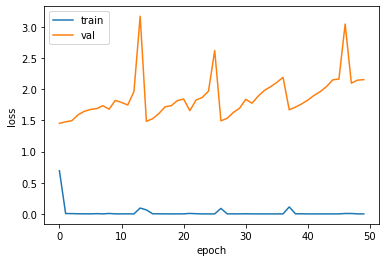

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

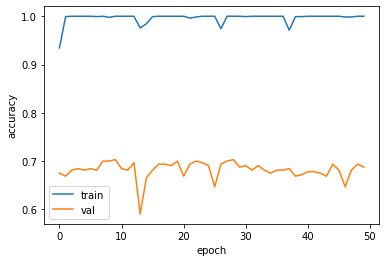

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()